### Bullish market indication (50 & 200 Day Moving averages) (Golden crosses)
* Moving average crosses occur when a short-term moving average and a long-term moving average intersect, signalling a change in market momentum. They are used to compare recent price behaviour with the broader, long-term trend. A golden cross happens when a shorter moving average (commonly the 50-day) crosses above a longer one (usually the 200-day), indicating that recent prices are rising faster than the long-term average. This is widely interpreted as a bullish signal, suggesting strengthening upward momentum and a potential transition from a bearish or neutral market into a sustained uptrend.

* To calculate moving average you take the closing prices for the last X (50 & 200) amount of days and calculate the total and devide by X (find the mean)

### Why it’s useful

Moving averages help with:
* Identifying trends (uptrend or downtrend)
* Reducing noise from short-term price swings
* Spotting potential buy/sell signals

### Important limitation

* Moving averages are lagging indicators — they react to past prices, not future ones. They’re best used with other indicators, not alone.

In [1]:
import yfinance as yf
import pandas as pd

In [9]:
#Get data from yfinance
def fetch_data(ticker, start="2020-01-01", end=None):
    """
    Download price data from yfinance.
    """
    df = yf.download(ticker, start=start, end=end, progress=False,auto_adjust=True)
    return df

In [3]:
#calculate both 50 day and 200 day moving averages
def compute_moving_averages(df, short=50, long=200):
    """
    Add 50 and 200 day SMAs to the DataFrame.
    """
    df[f"SMA_{short}"] = df["Close"].rolling(window=short).mean()
    df[f"SMA_{long}"]  = df["Close"].rolling(window=long).mean()
    return df

In [4]:
def detect_crosses(df, short=50, long=200):
    """
    Generate boolean columns for golden / death crosses.
    """
    sma_short = f"SMA_{short}"
    sma_long  = f"SMA_{long}"

    # Default boolean columns
    df["golden_cross"] = False
    df["death_cross"]  = False

    # Shifted values for crossover detection
    df["prev_short"] = df[sma_short].shift(1)
    df["prev_long"]  = df[sma_long].shift(1)

    # Golden cross: short moves above long
    df.loc[
        (df["prev_short"] < df["prev_long"]) &
        (df[sma_short] >= df[sma_long]),
        "golden_cross"
    ] = True

    # Death cross: short moves below long
    df.loc[
        (df["prev_short"] > df["prev_long"]) &
        (df[sma_short] <= df[sma_long]),
        "death_cross"
    ] = True

    # Clean up
    df.drop(["prev_short", "prev_long"], axis=1, inplace=True)
    return df

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualise(df):
    #Visualise the 50 and 200 moving averages
    sns.set(style="darkgrid")
    
    plt.figure(figsize=(14, 7))
    
    # Plot price and moving averages
    sns.lineplot(data=df, x=df.index, y=df["Close"].squeeze(), label="Close Price")
    sns.lineplot(data=df, x=df.index, y=df["SMA_50"].squeeze(), label="50-Day MA")
    sns.lineplot(data=df, x=df.index, y=df["SMA_200"].squeeze(), label="200-Day MA")
    
    # Highlight Golden Cross points
    golden_crosses = df[df["golden_cross"]]
    
    plt.scatter(
        golden_crosses.index,
        golden_crosses["SMA_50"].squeeze(),  # Convert to 1D array
        marker="X",
        s=120,
        label="Golden Cross"
    )
    
    #vertical line when there is a golden cross
    for date in golden_crosses.index:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)
    
    # Labels and title
    plt.title(f"{ticker} stock price with 50 & 200 Day Moving Averages (Golden Crosses)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    
    plt.show()

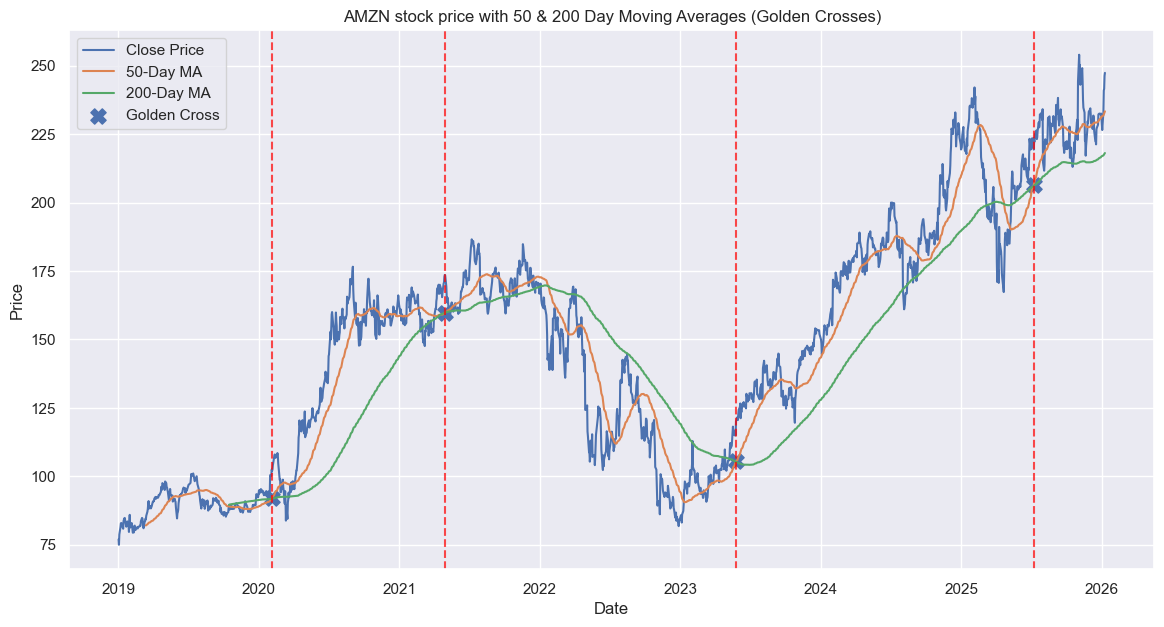

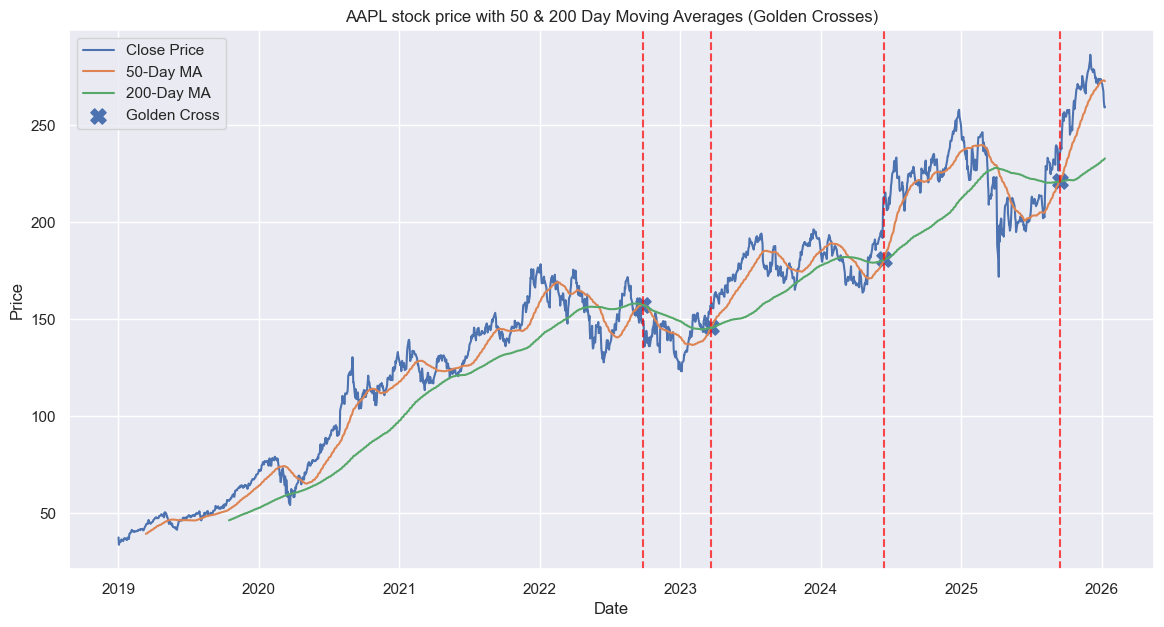

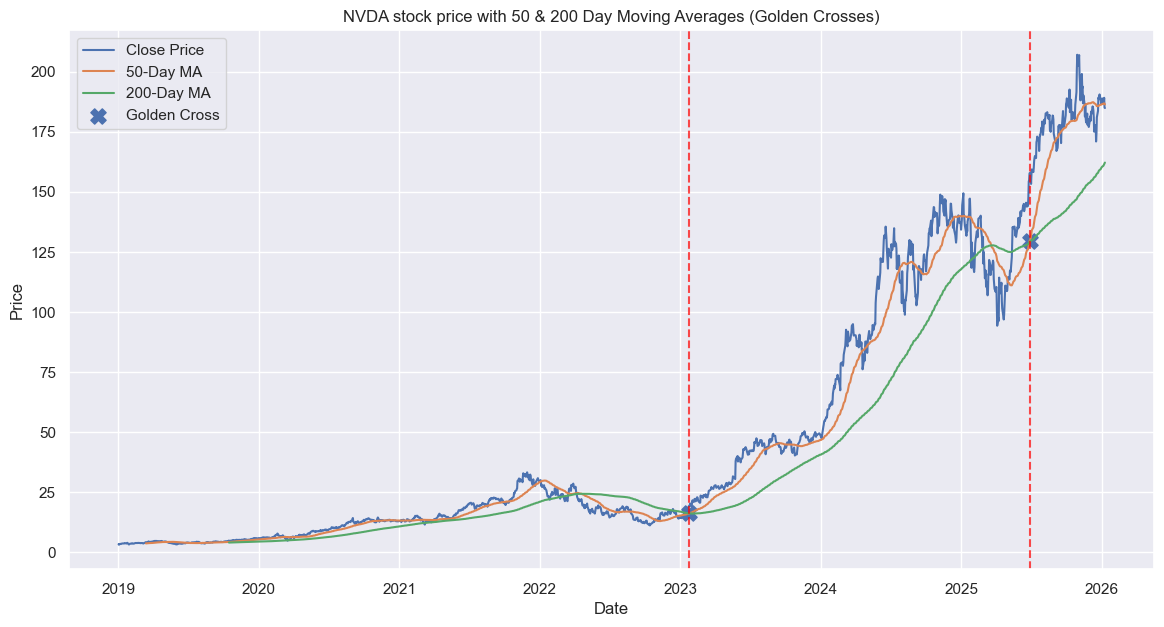

In [21]:
tickers = ["AMZN", "AAPL", "NVDA"]
for ticker in tickers:
    df = fetch_data(ticker, start="2019-01-01")
    df = compute_moving_averages(df)
    df = detect_crosses(df)
    visualise(df)